# Solution diffention eqution by frequency

In [1]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [103]:
def dif(t, x, v):
    d_x = v
    d_v = -x - 2*G * v - K *x**3
    return (d_x, d_v)

In [14]:
def eyler(dif, T, N, x_0, v_0=0):
    t = np.linspace(0, T, N)
    h = t[1]
    x = [x_0];  v = [v_0]
    for i in range(N-1):
        x.append(x[i] + h * dif(t[i], x[i], v[i])[0])
        v.append(v[i] + h * dif(t[i], x[i], v[i])[1])
    return (t, x, v)

In [15]:
def eyler_2(dif, T, N, x_0, v_0=0):
    t = np.linspace(0, T, N)
    h = t[1]
    t_2 = np.linspace(h / 2, T - h / 2, N-1)
    x = [x_0];   v = [v_0]
    for i in range(N-1):
        x_2 = x[i] + h/2 *  dif(t[i], x[i], v[i])[0]
        v_2 = v[i] + h/2 *  dif(t[i], x[i], v[i])[1]
        
        x.append(x[i] + h * dif(t_2[i], x_2, v_2)[0])
        v.append(v[i] + h * dif(t_2[i], x_2, v_2)[1])
    return (t, x, v)

In [216]:
def sol(dif, H, N, x_0, v_0=0):
    t = [0]; t_2 = 0.0; x = [x_0]; v = [v_0]
    for i in range(N-1):
        h = H / np.sqrt(1 + np.square(dif(t[i], x[i], v[i])[0])) ##get correct step
        t_2 = t[i] + h/2
        ##print(h)
        x_2 = x[i] + h/2 *  dif(t[i], x[i], v[i])[0]
        v_2 = v[i] + h/2 *  dif(t[i], x[i], v[i])[1]
        t.append(t[i] + h)
        x.append(x[i] + h * dif(t_2, x_2, v_2)[0])
        v.append(v[i] + h * dif(t_2, x_2, v_2)[1])
        ##plt.plot(t[i], x[i], 'o',color = 'g')
    return (t, x, v)

## Simple test, without dissipation and angarmonic

<IPython.core.display.Javascript object>


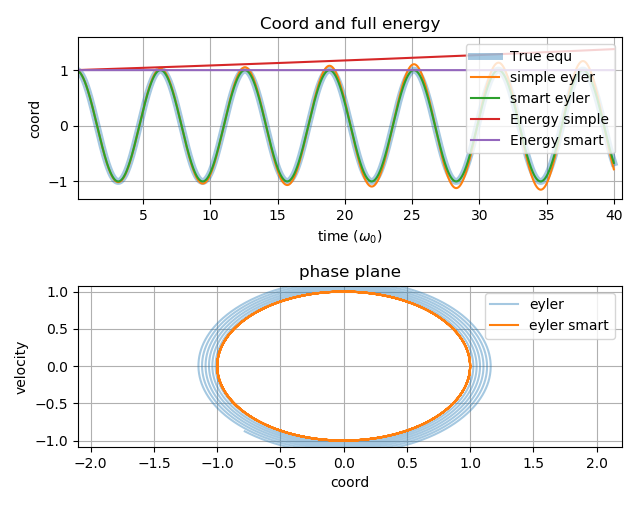

In [131]:
T = 40; N = 5000; G = 0; K = 0
x_0 = 1
v_0 = 0
t_e, x_e, v_e = eyler(dif, T, N, x_0, v_0)
t_e2, x_e2, v_e2 = eyler_2(dif, T, N, x_0, v_0)

t = np.linspace(0, T, N)
x = x_0  * np.cos(t) + v_0 * np.sin(t)
v = x_0 * (- np.sin(t)) + v_0 * np.cos(t)

W_e = np.array(v_e)**2+ np.array(x_e)**2
W_e2 = np.array(v_e2)**2 + np.array(x_e2)**2

plt.subplot(2, 1, 1)
plt.plot(t, x, label='True equ',linewidth=5, alpha=0.4)
plt.plot(t_e, x_e, label='simple eyler')
plt.plot(t_e2, x_e2, label='smart eyler')
plt.plot(t_e, W_e, label='Energy simple')
plt.plot(t_e2, W_e2, label='Energy smart')
plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.title('Coord and full energy')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(x_e, v_e, label='eyler', alpha = 0.4)
plt.plot(x_e2, v_e2, label='eyler smart')
plt.title('phase plane')
plt.xlabel('coord')
plt.ylabel('velocity')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


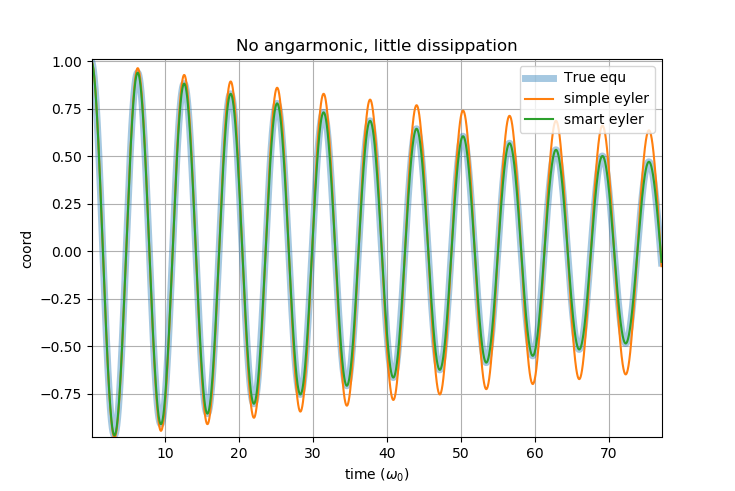

In [132]:
T = 80; N = 10000; G = 0.01; K = 0
x_0 = 1
v_0 = 0
t_e, x_e, v_e = eyler(dif, T, N, x_0, v_0)
t_e2, x_e2, v_e2 = eyler_2(dif, T, N, x_0, v_0)
t = np.linspace(0, T, N)
x = np.exp(-G * t) * (x_0  * np.cos(t) + v_0 * np.sin(t))

fig, ax = plt.subplots()
plt.plot(t, x, label='True equ',linewidth=5, alpha=0.4)
plt.plot(t_e, x_e, label='simple eyler')
plt.plot(t_e2, x_e2, label='smart eyler')

ax.set(xlabel='time ($\omega_0$)', ylabel='coord',
       title='No angarmonic, little dissippation')
plt.legend(loc='upper right')
ax.grid()

<IPython.core.display.Javascript object>


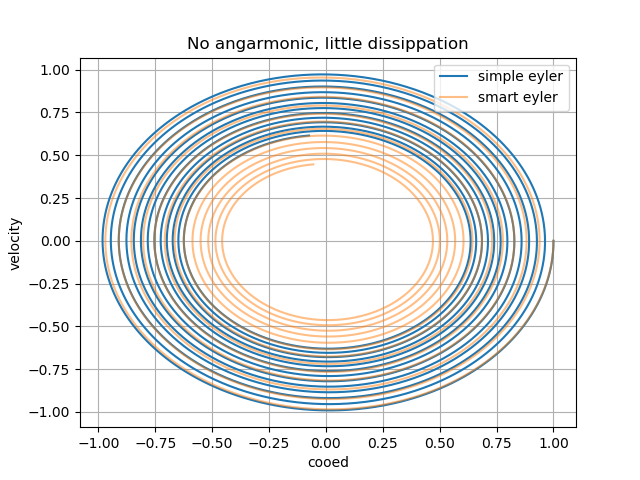

In [135]:
fig, ax = plt.subplots()
plt.plot(x_e, v_e, label='simple eyler')
plt.plot(x_e2, v_e2, label='smart eyler', alpha = 0.5)

ax.set(xlabel='cooed', ylabel='velocity',
       title='No angarmonic, little dissippation')
plt.legend(loc='upper right')
ax.grid()

<IPython.core.display.Javascript object>


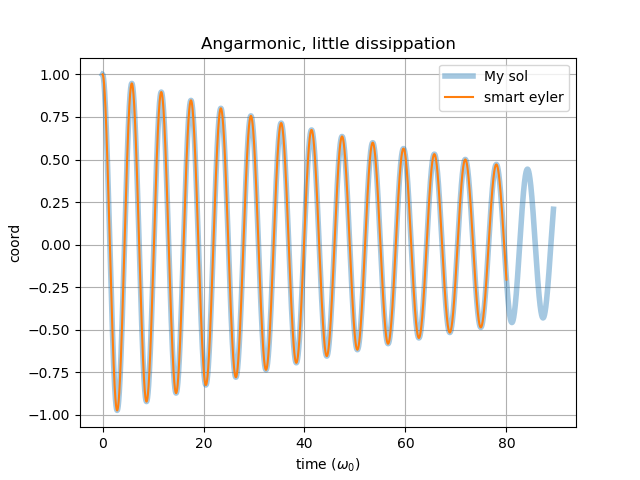

In [136]:
T = 80; N = 10000; G = 0.01; K = 0.25; H = 0.01
x_0 = 1
v_0 = 0
t_s, x_s, v_s = sol(dif, H, N, x_0, v_0)
t_e2, x_e2, v_e2 = eyler_2(dif, T, N, x_0, v_0)

fig, ax = plt.subplots()
plt.plot(t_s, x_s, label='My sol',linewidth=4, alpha=0.4)
plt.plot(t_e2, x_e2, label='smart eyler')

ax.set(xlabel='time ($\omega_0$)', ylabel='coord',
       title='Angarmonic, little dissippation')
plt.legend(loc='upper right')
ax.grid()

### Energy
$$\frac{v^2}{2} + \frac{x^2}{2} +K\frac{x^4}{4} = E_0$$

<IPython.core.display.Javascript object>


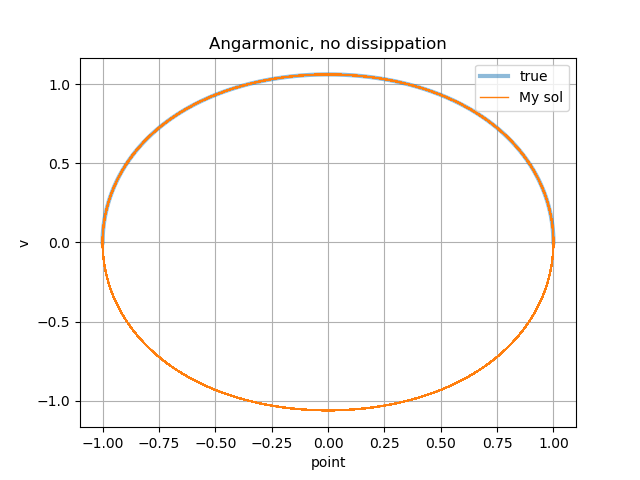

In [144]:
T = 80; N = 100000; G = 0; K = 0.25; H = 0.01
x_0 = 1
v_0 = 0
t_s, x_s, v_s = sol(dif, H, N, x_0, v_0)

fig, ax = plt.subplots()

E_0 = v_0**2 / 2 + x_0**2 /2 + K * x_0**4 / 4
x = np.linspace(- x_0, x_0, 10000)
v = np.sqrt(2 * E_0 - x**2 - K * x**4 / 2)
plt.plot(x, v,  label='true', linewidth=3, alpha = 0.5)
plt.plot(x_s, v_s, label='My sol',linewidth=1)
ax.set(xlabel='point', ylabel='v',
       title='Angarmonic, no dissippation')
plt.legend(loc='upper right')
ax.grid()

## Math 

In [145]:
def dif_math(t, x, v):
    d_x = v
    d_v = -np.sin(x) - 2*G * v
    return (d_x, d_v)

<IPython.core.display.Javascript object>


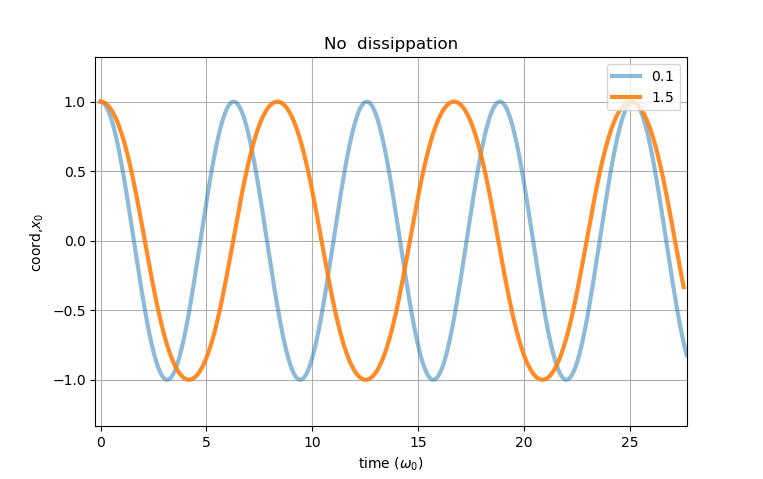

In [152]:
N = 40000; G = 0; H = 0.001
x_0_0 = 0.1
t_s_0, x_s_0, v_s_0 = sol(dif_math, H, N, x_0_0)

x_0_1 = 0.5
t_s_1, x_s_1, v_s_1 = sol(dif_math, H, N, x_0_1)

x_0_4 = 2
t_s_4, x_s_4, v_s_4 = sol(dif_math, H, N, x_0_4)

x_s_0 = np.array(x_s_0) * 10
x_s_4 = np.array(x_s_4) / 2


fig, ax = plt.subplots()
plt.plot(t_s_0, x_s_0, label='$0.1$',linewidth=3, alpha=0.5)

plt.plot(t_s_4, x_s_4, label='$1.5$',linewidth=3, alpha=0.9)


ax.set(xlabel='time ($\omega_0$)', ylabel='coord,$x_0$',
       title='No  dissippation')
plt.legend(loc='upper right')
ax.grid()

<IPython.core.display.Javascript object>


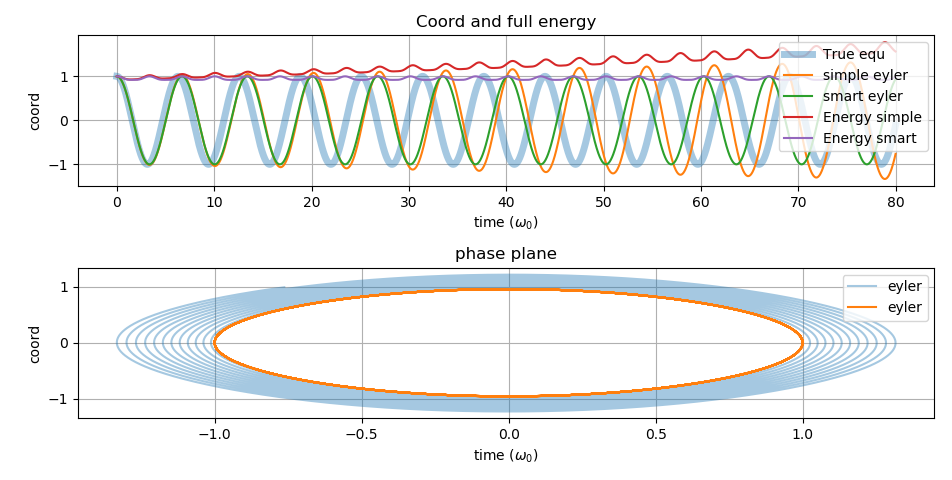

In [90]:
N = 50000; G = 0.03; H = 0.002
x_0_0 = 0.1
t_s_0, x_s_0, v_s_0 = sol(dif, H, N, x_0_0)
x_0_1 = 0.8
t_s_1, x_s_1, v_s_1 = sol(dif, H, N, x_0_1)

fig, ax = plt.subplots()
plt.plot(t_s_0, x_s_0, label='$0.1$',linewidth=3, alpha=0.5)
plt.plot(t_s_1, np.array(x_s_1) / 8, label='$0.8$',linewidth=2, alpha=0.8)

ax.set(xlabel='time ($\omega_0$)', ylabel='coord,$0.1$',
       title='No  dissippation')
plt.legend(loc='upper right')
ax.grid()

<IPython.core.display.Javascript object>


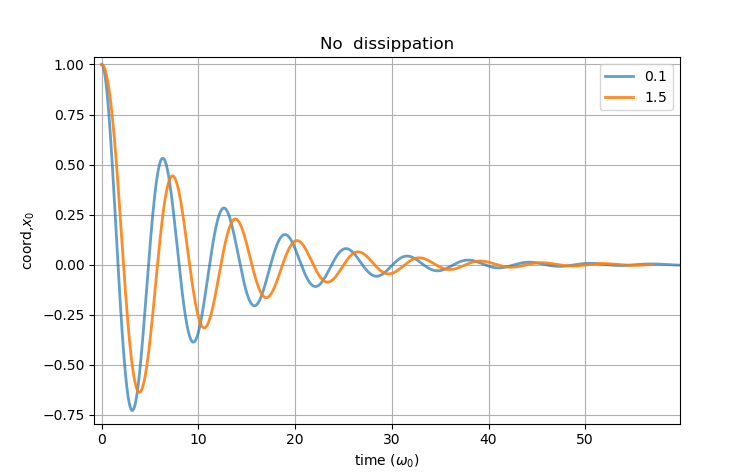

In [156]:
N = 60000; G = 0.1; H = 0.001
x_0_0 = 0.1
t_s_0, x_s_0, v_s_0 = sol(dif_math, H, N, x_0_0)

x_0_1 = 0.5
t_s_1, x_s_1, v_s_1 = sol(dif_math, H, N, x_0_1)

x_0_4 = 2
t_s_4, x_s_4, v_s_4 = sol(dif_math, H, N, x_0_4)

x_s_0 = np.array(x_s_0) * 10
x_s_4 = np.array(x_s_4) / 2


fig, ax = plt.subplots()
plt.plot(t_s_0, x_s_0, label='$0.1$',linewidth=2, alpha=0.7)

plt.plot(t_s_4, x_s_4, label='$1.5$',linewidth=2, alpha=0.9)


ax.set(xlabel='time ($\omega_0$)', ylabel='coord,$x_0$',
       title='No  dissippation')
plt.legend(loc='upper right')
ax.grid()

# Hw solution 
Next week I got this task by theory mechanic.
![N|Solid](https://pp.userapi.com/c850236/v850236827/100b1a/FEiQTgOitT0.jpg)
***Let's go solve it***


## Phys task
#### Lagrangian:
$$\mathcal{L} = K(\vec{v}^2, \vec{r}) - U(\vec{r}, t) $$
It is not hard to show, that, if $l=1$ and $g  = 1$, we get:
$$\mathcal{L} = \varphi_0^{out}\omega\cos(\omega t)\dot{\varphi}\cos\varphi + \frac{\dot{\varphi}^2}{2} + \cos\varphi$$
next:
$$
\frac{\partial}{\partial \dot{\varphi}}\mathcal{L}  = \varphi_0^{out}\omega\cos(\omega t)\cos\varphi + \dot{\varphi} 
$$
$$
\frac{\text{d}}{\text{d}t}\frac{\partial}{\partial \dot{\varphi}}\mathcal{L} = \ddot{\varphi} - \varphi_0^{out}\omega^2\sin(\omega t)\cos\varphi - \varphi_0^{out}\omega\cos(\omega t)\dot{\varphi}\sin\varphi 
$$
$$
\frac{\partial}{\partial \varphi}\mathcal{L} = - \varphi_0^{out}\omega\cos(\omega t)\dot{\varphi}\sin\varphi - \sin\varphi 
$$
Result:
$$
\ddot{\varphi} + \sin\varphi = \varphi_0^{out}\omega^2\sin(\omega t)\cos\varphi 
$$

In [157]:
def dif_my(t, x, v, f_0, w):
    d_x = v
    d_v = -np.sin(x) + f_0 * w**2 * np.sin(w*t) * np.cos(x)
    return (d_x, d_v)

In [163]:
def this(f_0=0.03, w=0):
    def dif_my(t, x, v):
        d_x = v
        d_v = -np.sin(x) + f_0 * w**2 * np.sin(w*t) * np.cos(x)
        return (d_x, d_v)
    return dif_my
    

<IPython.core.display.Javascript object>


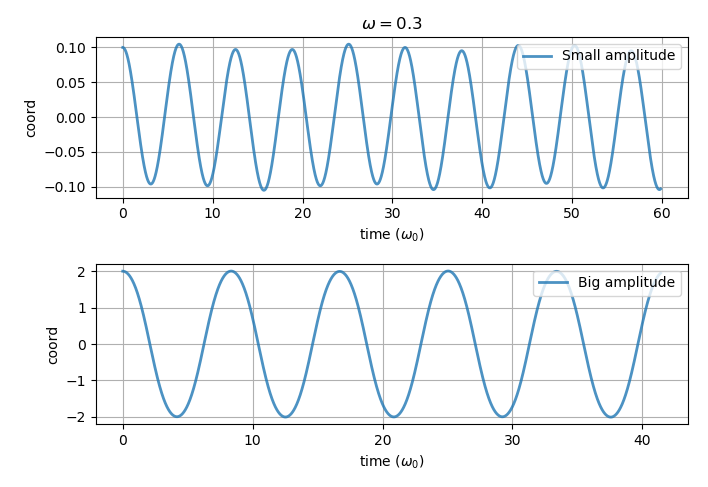

In [167]:
N = 6000;H = 0.01; f_0 = 0.05; w = 0.3
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.title('$\omega = 0.3$')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


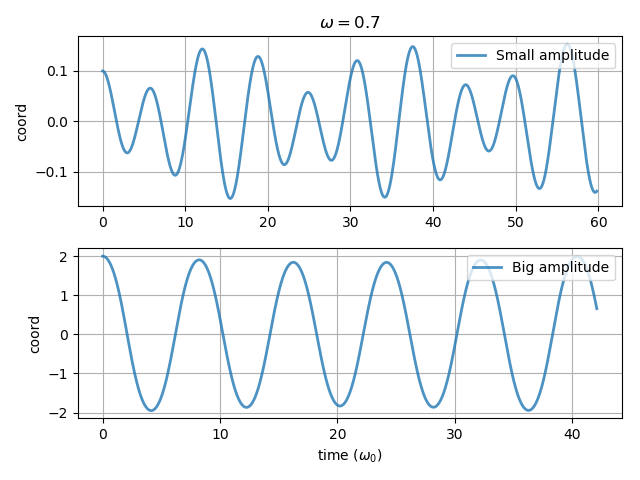

In [170]:
N = 6000;H = 0.01; f_0 = 0.05; w = 0.7
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.ylabel('coord')
plt.title('$\omega = 0.7$')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


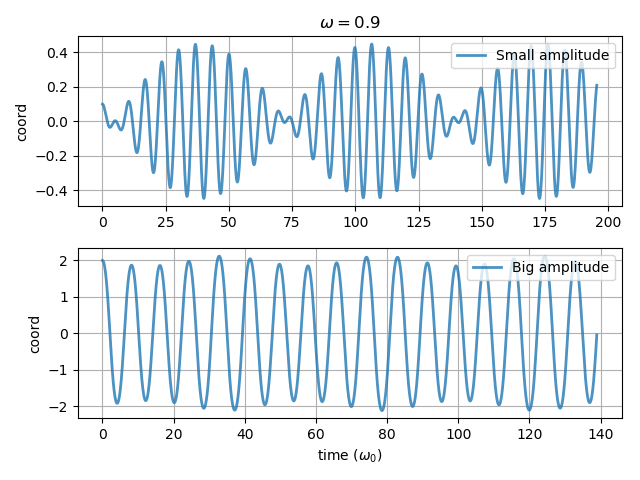

In [172]:
N = 100000;H = 0.002; f_0 = 0.05; w = 0.9
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.ylabel('coord')
plt.title('$\omega = 0.9$')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


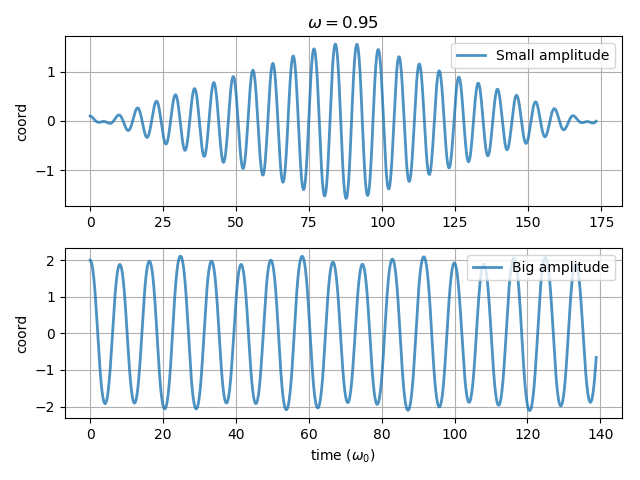

In [174]:
N = 100000;H = 0.002; f_0 = 0.05; w = 0.95
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.ylabel('coord')
plt.title('$\omega = 0.95$')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


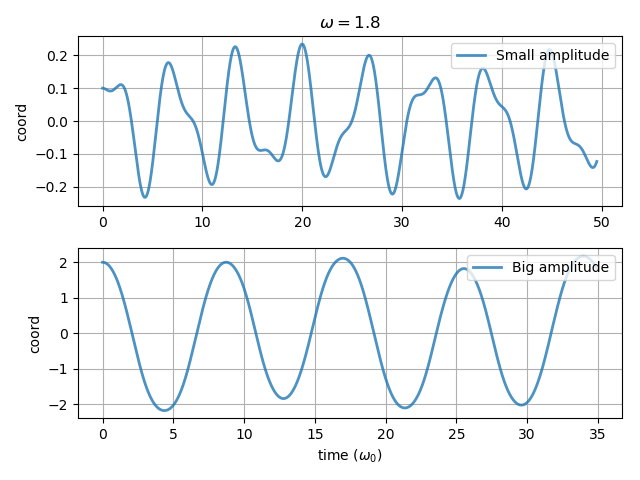

In [185]:
N = 100000;H = 0.0005; f_0 = 0.05; w = 1.8
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.ylabel('coord')
plt.title(r'$\omega = %s $' % w)
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


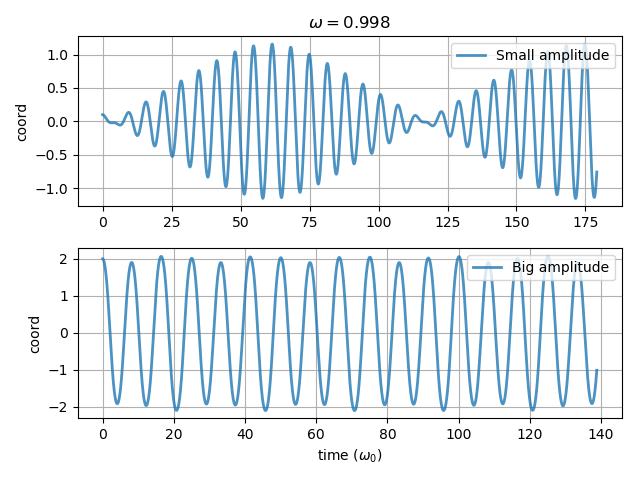

In [176]:
N = 100000;H = 0.002; f_0 = 0.05; w = 0.998
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.ylabel('coord')
plt.title('$\omega = 0.998$')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


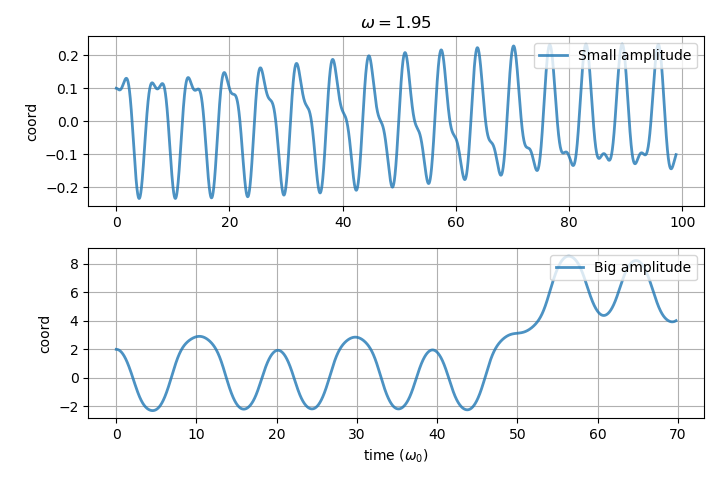

In [188]:
N = 100000;H = 0.001; f_0 = 0.05; w = 1.95
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot(2, 1, 1)
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)

plt.ylabel('coord')
plt.title(r'$\omega = %s $' % w)
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)

plt.plot(t_1, x_1, label='Big amplitude',linewidth=2, alpha=0.8)

plt.xlabel('time ($\omega_0$)')
plt.ylabel('coord')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


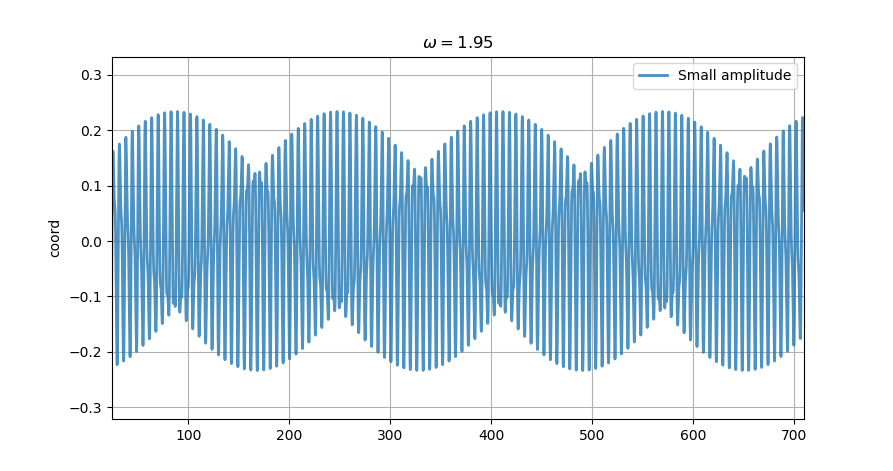

In [189]:
N = 1000000;H = 0.001; f_0 = 0.05; w = 1.95
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)

x_0_4 = 2
t_1, x_1, v_1 = sol(this(f_0, w), H, N, x_0_4)

plt.subplot
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)
plt.ylabel('coord')
plt.title(r'$\omega = %s $' % w)
plt.grid(True)
plt.legend(loc='upper right')


<IPython.core.display.Javascript object>


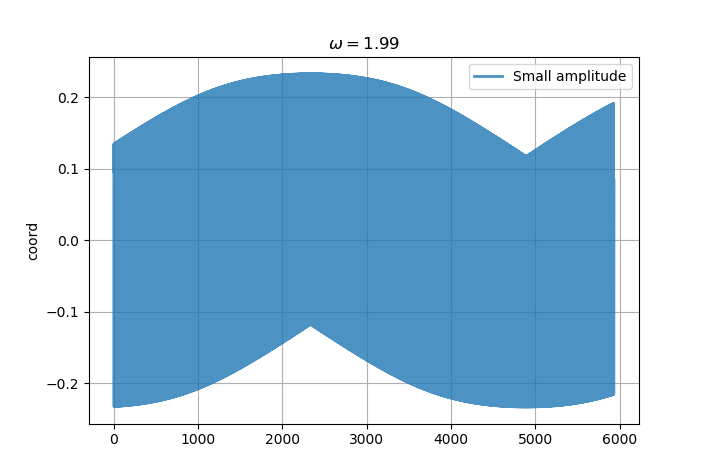

In [218]:
N = 3000000;H = 0.002; f_0 = 0.05; w = 1.99
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)
plt.subplot
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)
plt.ylabel('coord')
plt.title(r'$\omega = %s $' % w)
plt.grid(True)
plt.legend(loc='upper right')

In [ ]:
N = 3000000;H = 0.004; f_0 = 0.05; w = 1.995
x_0_0 = 0.1
t_0, x_0, v_0 = sol(this(f_0, w), H, N, x_0_0)
plt.subplot
plt.plot(t_0, x_0, label='Small amplitude',linewidth=2, alpha=0.8)
plt.ylabel('coord')
plt.title(r'$\omega = %s $' % w)
plt.grid(True)
plt.legend(loc='upper right')